In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [2]:
'''Loading Data from selected mortality dataset(only 15 columns)'''

df=[] #len=11, each = 1yr
for i in range(2005,2016):
    url = 'data/mortality_selected/'+str(i)+'.csv'
    df1 = pd.read_csv(url)
    df.append(df1)
    print('Loading data of year',i)
del df1

Loading data of year 2005
Loading data of year 2006
Loading data of year 2007
Loading data of year 2008
Loading data of year 2009
Loading data of year 2010
Loading data of year 2011
Loading data of year 2012
Loading data of year 2013
Loading data of year 2014
Loading data of year 2015


In [3]:
df[0]

,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,activity_code,race,5y_age_band_recode,rankable_cause_recode
0,11.0,NaN,0,1,F,45,M,2,2005,U,7.0,NaN,1,10,4
1,13.0,NaN,0,1,M,61,D,7,2005,U,7.0,NaN,1,13,13
2,12.0,NaN,0,1,F,79,D,1,2005,U,7.0,NaN,1,16,9
3,12.0,NaN,0,1,M,50,S,4,2005,U,7.0,NaN,1,11,5
4,14.0,NaN,0,1,F,68,M,2,2005,U,7.0,NaN,1,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452501,NaN,9.0,1,12,M,59,U,1,2005,U,NaN,NaN,1,12,7
2452502,NaN,1.0,1,9,M,2,S,4,2005,U,NaN,NaN,2,1,18
2452503,NaN,1.0,1,8,F,22,S,4,2005,U,NaN,NaN,2,1,18
2452504,NaN,1.0,1,8,M,1,S,3,2005,U,NaN,NaN,1,1,18


# Prepossessing Data
no longer need when using mortality_selected data

# Overall Trend of Leading Death Causes

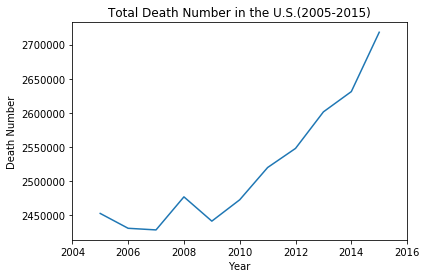

In [4]:
'''
Total Death Number Trend
'''
dnumber = [] #death number of each year in a list
for i in range(11):
    dnumber.append(df[i].shape[0])

plt.plot(np.arange(2005,2016), dnumber)
plt.xlabel('Year')
plt.ylabel('Death Number')
plt.title('Total Death Number in the U.S.(2005-2015)')
plt.xlim(2004,2016)
plt.show()

In [5]:
'''Leading Death Causes Over 11 Yrs'''
# generate topcause_df to store leading cause data
# colums: ['year', rankable_cause_recode]
# data: number of death of year&cause

#init topcause_df
col_name = ['year']
col_name.extend([str(i) for i in range(1,28)])
topcause_df = pd.DataFrame(data=np.zeros((11,28), dtype=int), columns=col_name)
topcause_df['year'] = [str(i) for i in range(2005,2016)]

#calculate data
cols = col_name[1:]
for i in range(11):
    topcause_df.loc[i,cols] = df[i].groupby('rankable_cause_recode').size().values

topcause_df

,year,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2005,653,47,12597,559962,75207,71611,653301,24926,143789,...,14577,10457,2232,29930,370232,45711,75688,32708,18215,5222
1,2006,658,38,12165,560537,72525,72446,632861,23867,137329,...,14468,10526,2324,29562,389319,45694,79334,33400,18681,5631
2,2007,561,42,11332,563569,71459,74648,617270,23992,136193,...,14650,10459,2454,31206,393695,44299,82873,34691,18489,5852
3,2008,585,34,10345,566215,70649,82453,618140,25777,134401,...,13983,10332,2353,36358,412650,40129,85254,36132,17925,5502
4,2009,537,34,9444,568226,68776,79018,600435,25763,129037,...,13150,9925,2226,37798,414683,36473,84942,37006,16885,5471
5,2010,575,28,8406,575388,69154,83510,598729,26666,129683,...,12156,9696,2063,36550,434621,35590,88539,38441,16312,5357
6,2011,543,45,7721,577320,73916,84991,597732,27881,129143,...,12076,9722,1911,38561,461225,35519,94256,39624,16317,5305
7,2012,519,37,7246,583320,74010,83653,600926,29137,128766,...,11968,9665,1679,40655,477695,36679,94541,40685,16771,5347
8,2013,561,49,6999,585536,75663,84782,612266,30800,129194,...,12123,9605,1563,36458,499292,35650,98492,41246,16187,5152
9,2014,498,43,6755,592466,76590,93567,615588,30246,133320,...,11943,9636,1546,30967,505958,35688,103714,42877,15888,5150


In [6]:
#save to a csv file for possible later use

topcause_df.to_csv('data/generated data/topcause_years.csv', index=False)

Text(0.5, 1.0, 'Top 8 Leading Cause of Death (2005-2015)')

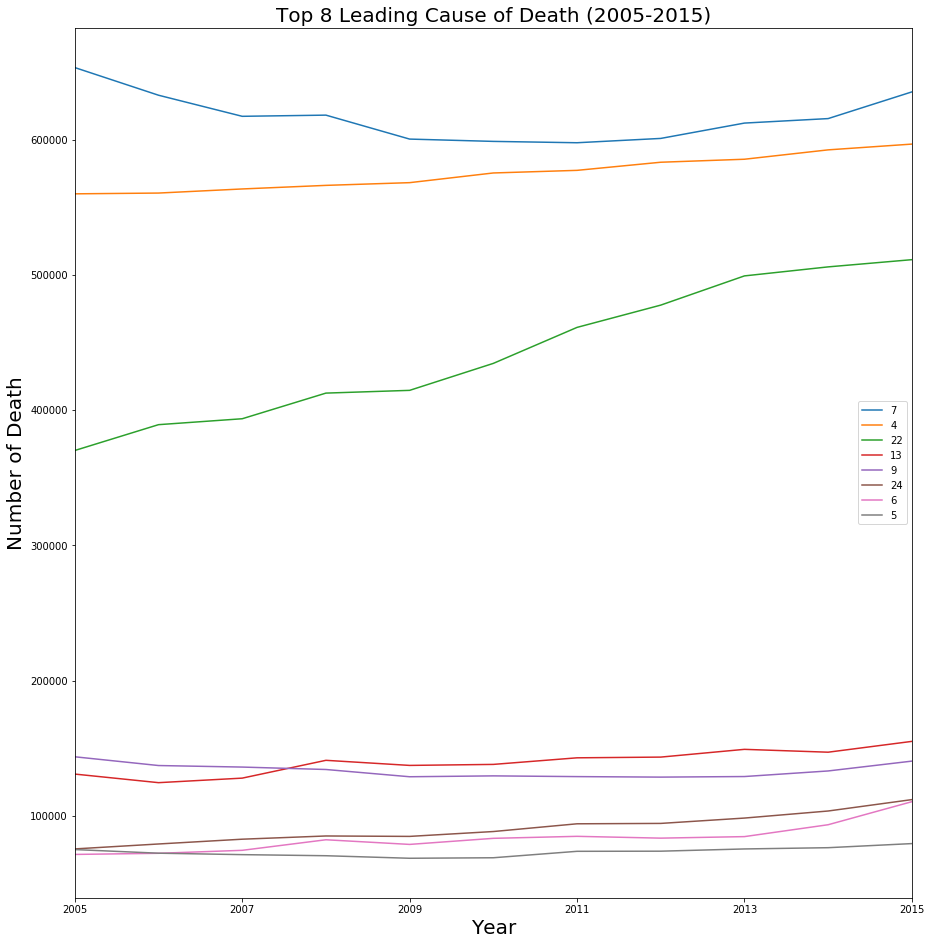

In [7]:
# Top 8 causes plot
# several lines - each stands for one cause
# x - year
# y - leading causes number/percentage

top8_code = topcause_df.mean().sort_values(ascending=False).index[1:9].values
topcause_df.plot(x='year', y=top8_code, figsize=(15,16))
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Death', fontsize=20)
plt.title('Top 8 Leading Cause of Death (2005-2015)', fontsize=20)

In [8]:
'''Top 8 Causese Change Rate Compare'''
# Create dataframe top_change_rate
# col: time-interval(2005-2006, 2006-2007,...); rankable_code
# data: rate of interval & cause_code

#init dataframe
col_name = ['time_interval']
col_name.extend(top8_code)
top8_changerate_df = pd.DataFrame(data=np.zeros((10,9), dtype=float), columns=col_name)
top8_changerate_df['time_interval'] = [str(2005+i)+'-'+str(2006+i) for i in range(10)]

#calculate the data
for i in range(10):
    top8_changerate_df.loc[i,top8_code]=(topcause_df.loc[i+1,top8_code]-topcause_df.loc[i,top8_code])/topcause_df.loc[i,top8_code]

top8_changerate_df

,time_interval,7,4,22,13,9,24,6,5
0,2005-2006,-0.031287,0.001027,0.051554,-0.048461,-0.044927,0.048171,0.011660,-0.035662
1,2006-2007,-0.024636,0.005409,0.011240,0.026928,-0.008272,0.044609,0.030395,-0.014698
2,2007-2008,0.001409,0.004695,0.048146,0.102811,-0.013158,0.028731,0.104557,-0.011335
3,2008-2009,-0.028642,0.003552,0.004927,-0.026660,-0.039910,-0.003660,-0.041660,-0.026511
4,2009-2010,-0.002841,0.012604,0.048080,0.005421,0.005006,0.042347,0.056848,0.005496
5,2010-2011,-0.001665,0.003358,0.061212,0.035255,-0.004164,0.064570,0.017734,0.068861
6,2011-2012,0.005344,0.010393,0.035709,0.003712,-0.002919,0.003024,-0.015743,0.001272
7,2012-2013,0.018871,0.003799,0.045211,0.039912,0.003324,0.041791,0.013496,0.022335
8,2013-2014,0.005426,0.011835,0.013351,-0.014120,0.031936,0.053020,0.103619,0.012252
9,2014-2015,0.032038,0.007197,0.010540,0.054291,0.054523,0.081146,0.181891,0.039587


In [10]:
top8_changerate_df.to_csv('data/generated data/top8_change_rate.csv', index=False)

Text(0.5, 1.0, 'Top 8 Death Causes Change Rate (2005-2015)')

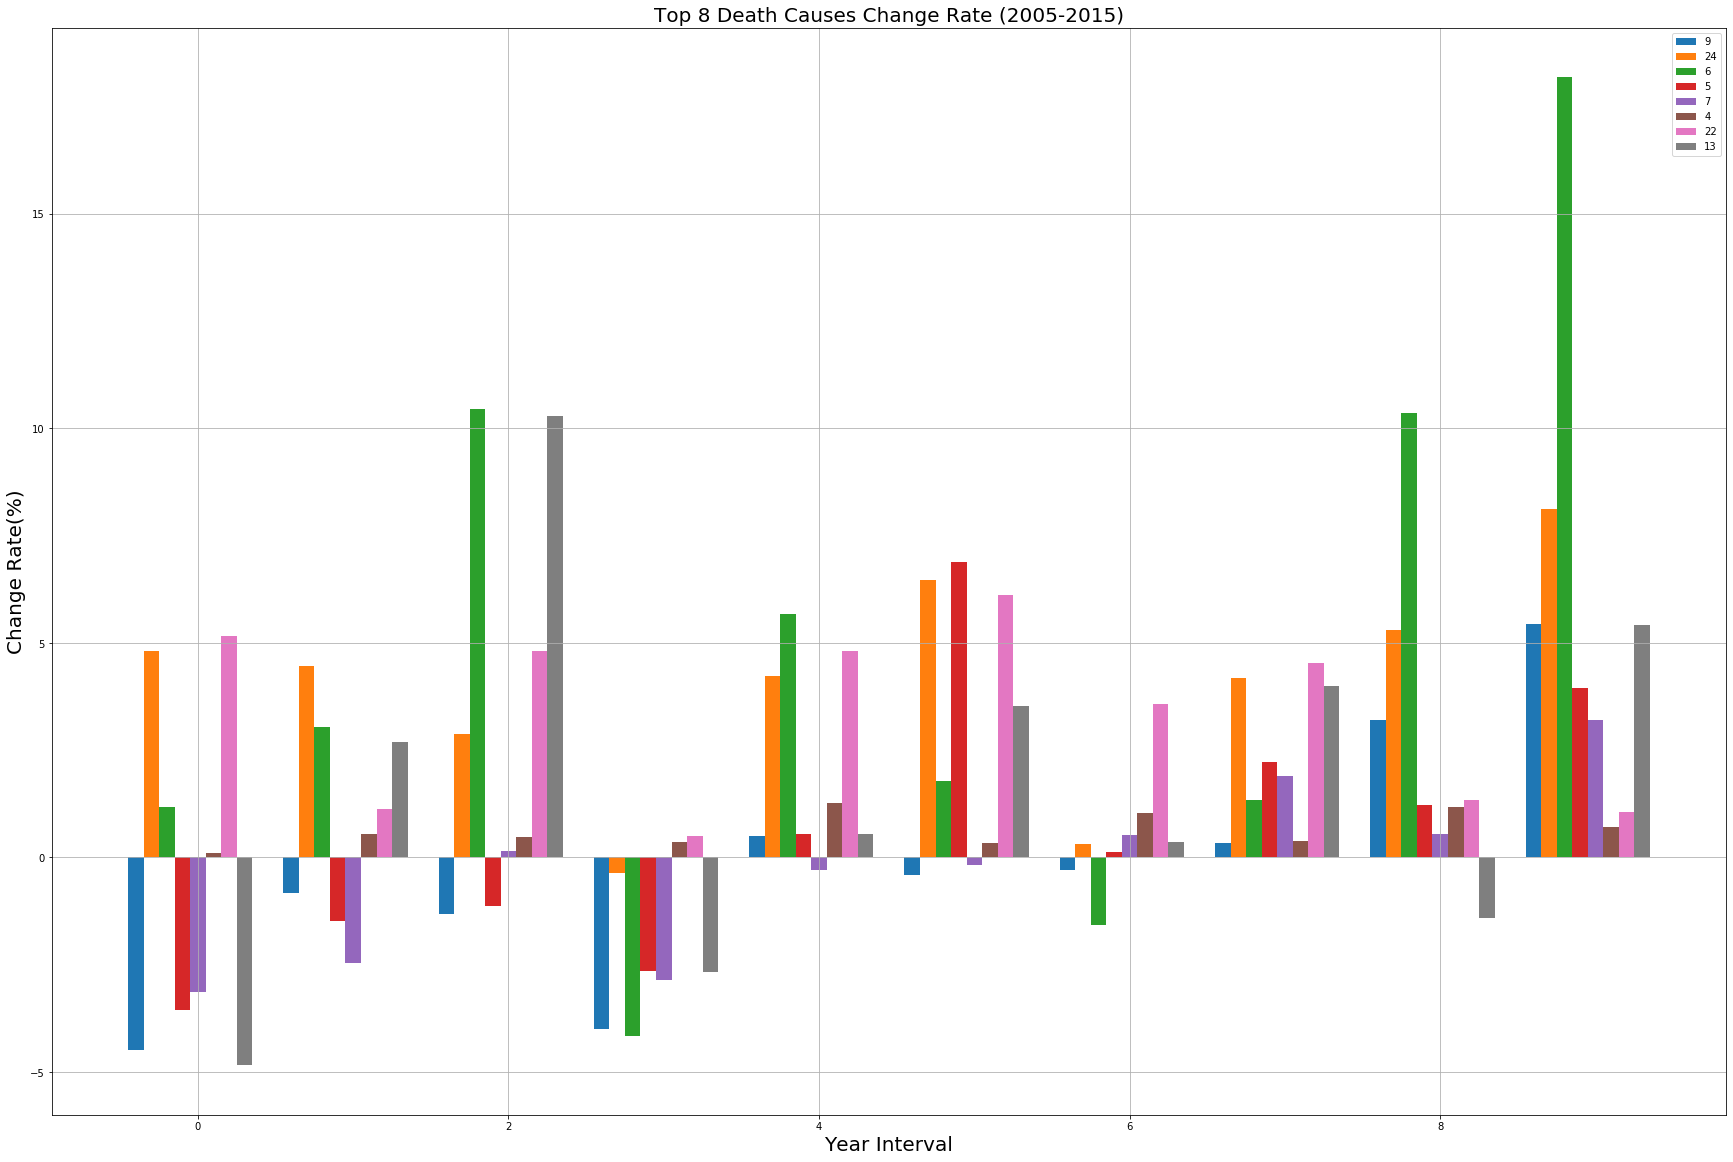

In [11]:
# plot the rate change of leading cause of death
# x-time interval; y- change rate
total_width, n = 0.8, 8
width = total_width / n

#x = top8_changerate_df['time_interval']
x = np.arange(10)

plt.figure(figsize=(30,20))
for i in range(-4,4):
    plt.bar(x+i*width, top8_changerate_df[top8_code[i]]*100, width=width, label=top8_code[i])

plt.legend(loc='best')
plt.grid(b=True, axis='both')
plt.xlabel('Year Interval', fontsize=20)
plt.ylabel('Change Rate(%)', fontsize=20)
plt.title('Top 8 Death Causes Change Rate (2005-2015)', fontsize=20)
#plt.xticks(np.arange(8), top8_code)

In [12]:
del col_name, cols, dnumber, i, n, total_width,width,x,url

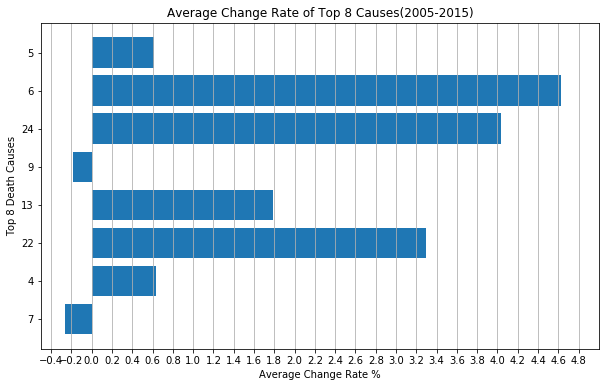

In [25]:
'''Causes Average Change Rate(Avg of 11 years)'''
y = top8_changerate_df.columns.values[1:]
data = top8_changerate_df.loc[:, y].mean().values*100

plt.figure(figsize=(10,6))
plt.barh(y=y, width=data)
plt.title('Average Change Rate of Top 8 Causes(2005-2015)')
plt.xlabel('Average Change Rate %')
plt.ylabel('Top 8 Death Causes')
plt.xticks(np.arange(-0.4,5.0,0.2))
plt.xlim(-0.5,5.0)
plt.grid(axis='x')